In [1]:
!pip install scikit-opt

<ipython-input-5-837ef37eec26>:47: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ga_tsp.Chrom = np.concatenate([np.zeros(shape=(ga_tsp.size_pop, num_vehicle - 1), dtype=np.int), ga_tsp.Chrom + 1],


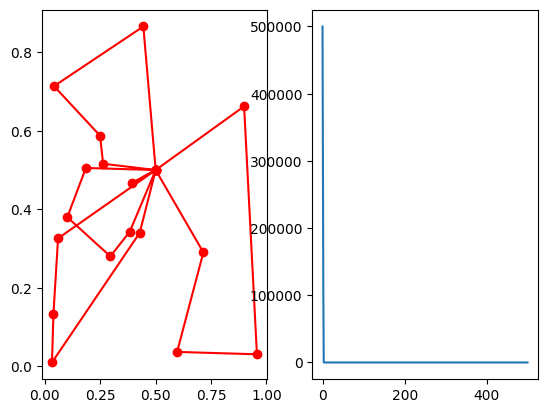

In [5]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

num_customers = 17
num_vehicle = 5
num_points = 1 + num_customers
max_capacity = 5

customers_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
depot_coordinate = np.array([[0.5, 0.5]])
points_coordinate = np.concatenate([depot_coordinate, customers_coordinate], axis=0)

distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return distance_matrix[0, routine[0]] \
           + sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)]) \
           + distance_matrix[routine[-1], 0]


def constraint_capacity(routine):
    capacity = 0
    c = 0
    for i in routine:
        if i != 0:
            c += 1
        else:
            capacity = max(capacity, c + 1)
            c = 0
    capacity = max(capacity, c + 1)
    return capacity - max_capacity


# %%

from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_customers, size_pop=50, max_iter=500, prob_mut=1, )

# The index of customers range from 1 to num_customers:
ga_tsp.Chrom = np.concatenate([np.zeros(shape=(ga_tsp.size_pop, num_vehicle - 1), dtype=np.int), ga_tsp.Chrom + 1],
                              axis=1)
ga_tsp.has_constraint = True
ga_tsp.constraint_ueq = [constraint_capacity]
best_points, best_distance = ga_tsp.run()

# %%

fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([[0], best_points, [0]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()
